In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPool2D 
from tensorflow.keras.initializers import RandomNormal

In [4]:
################################################################################################################################

In [5]:
X_train_tmp_folder_path = 'C:\hyundai_cgan_data' + '\\circular_vane_design' + '\\tmp_input_data_circular'
X_train_dsp_folder_path = 'C:\hyundai_cgan_data' + '\\circular_vane_design' + '\\dsp_input_data_circular'
Y_train_folder_path = 'C:\hyundai_cgan_data' + '\\circular_vane_design'  '\\circular_vane_output'

In [6]:
X_train_tmp_elements = os.listdir(X_train_tmp_folder_path) 
X_train_dsp_elements = os.listdir(X_train_dsp_folder_path) 
Y_train_elements = os.listdir(Y_train_folder_path)

In [7]:
################################################################################################################################

In [8]:
i=0
for elm in X_train_tmp_elements:
    i=i+1    
print(i)

20


In [9]:
i=0
for elm in X_train_dsp_elements:
    i=i+1    
print(i)

20


In [10]:
j=0
for elm in Y_train_elements:
    j=j+1    
print(j)

20


In [11]:
################################################################################################################################

In [12]:
X_train = np.zeros((20,256,256,2))
Y_train = np.zeros((20,256,256,1))

In [13]:
################################################################################################################################

In [14]:
# DEVELOPING X_train MATRIX

for index, (tmp_element, dsp_element) in enumerate(zip(X_train_tmp_elements, X_train_dsp_elements)):
    # Load images for each channel
    tmp_element_path = os.path.join(X_train_tmp_folder_path, tmp_element)
    dsp_element_path = os.path.join(X_train_dsp_folder_path, dsp_element)
    img_tmp = imread(tmp_element_path)
    img_dsp = imread(dsp_element_path)
      
    # Reshape images for each channel
    img_tmp = img_tmp.reshape((256,256, 1))
    img_dsp = img_dsp.reshape((256,256, 1))
    
    # Combine channels
    img_combined = np.concatenate((img_tmp, img_dsp), axis=2)
    
    # Assign to X_train
    X_train[index] = img_combined

In [15]:
# DEVELOPING Y_train MATRIX
for index,Y_train_element in enumerate(Y_train_elements):
    element_path = os.path.join(Y_train_folder_path, Y_train_element)
    img = imread(element_path)
    img = np.mean(img, axis=2)
    img = img/255
    img = img.reshape((256, 256, 1))
    Y_train[index] = img

In [16]:
################################################################################################################################

In [17]:
model = Sequential()
    
init = RandomNormal(stddev=0.02, seed=42) 

#CONVOLUTIONAL LAYER 1
model.add(Conv2D(filters=32,kernel_size=(2,2),strides=(1,1),padding='same',input_shape=(256,256,2),activation='relu', kernel_initializer=init))
#MAXPOOLING LAYER
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#CONVOLUTIONAL LAYER 2
model.add(Conv2D(filters= 64,kernel_size=(2,2),strides=(1,1),padding='same',activation='relu', kernel_initializer=init))
#MAXPOOLING LAYER
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#CONVOLUTIONAL LAYER 3
model.add(Conv2D(filters= 128,kernel_size=(2,2),strides=(1,1),padding='same',activation='relu', kernel_initializer=init))
#MAXPOOLING LAYER
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#CONVOLUTIONAL LAYER 4
model.add(Conv2D(filters= 256,kernel_size=(4,4),strides=(1,1),padding='same',activation='relu', kernel_initializer=init))
#MAXPOOLING LAYER
model.add(MaxPool2D(pool_size=(4,4),strides=(4,4)))

#CONVOLUTIONAL LAYER 2
model.add(Conv2D(filters= 512,kernel_size=(2,2),strides=(1,1),padding='same',activation='relu', kernel_initializer=init))
#MAXPOOLING LAYER
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
   
# FLATTENING THE ABOVE LAYER
model.add(tf.keras.layers.Flatten())

# DENSE LAYER 1
model.add(tf.keras.layers.Dense(units=4000, activation='relu', kernel_initializer=init))
          
# DENSE LAYER 2
model.add(tf.keras.layers.Dense(units=8192, activation='relu', kernel_initializer=init))          

# RESHAPING THE ABOVE LAYER
model.add(tf.keras.layers.Reshape(target_shape=(4,4,512)))
          
#TRANSPOSE CONVOLUTIONAL LAYER 1
model.add(Conv2DTranspose(filters=256,kernel_size=(2,2),strides=(2,2),activation='relu', kernel_initializer=init))

#TRANSPOSE CONVOLUTIONAL LAYER 2
model.add(Conv2DTranspose(filters=128,kernel_size=(4,4),strides=(4,4),activation='relu', kernel_initializer=init))

#TRANSPOSE CONVOLUTIONAL LAYER 3
model.add(Conv2DTranspose(filters=64,kernel_size=(2,2),strides=(2,2),activation='relu', kernel_initializer=init))
    
#TRANSPOSE CONVOLUTIONAL LAYER 4
model.add(Conv2DTranspose(filters=32,kernel_size=(2,2),strides=(2,2),activation='relu', kernel_initializer=init))

#TRANSPOSE CONVOLUTIONAL LAYER 5
model.add(Conv2DTranspose(filters=1,kernel_size=(2,2),strides=(2,2),activation='relu', kernel_initializer=init))

#COMPILING THE MODEL
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      288       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0

In [19]:
model.fit(X_train,Y_train,epochs = 5000)

Epoch 1/5000
1/1 [==============================] - 3s 3s/step - loss: 0.9534
Epoch 2/5000
1/1 [==============================] - 2s 2s/step - loss: 0.9513
Epoch 3/5000
1/1 [==============================] - 2s 2s/step - loss: 0.9491
Epoch 4/5000
1/1 [==============================] - 2s 2s/step - loss: 0.9468
Epoch 5/5000
1/1 [==============================] - 2s 2s/step - loss: 0.9445
Epoch 6/5000
1/1 [==============================] - 2s 2s/step - loss: 0.9420
Epoch 7/5000
1/1 [==============================] - 2s 2s/step - loss: 0.9394
Epoch 8/5000
1/1 [==============================] - 2s 2s/step - loss: 0.9367
Epoch 9/5000
1/1 [==============================] - 2s 2s/step - loss: 0.9339
Epoch 10/5000
1/1 [==============================] - 2s 2s/step - loss: 0.9309
Epoch 11/5000
1/1 [==============================] - 2s 2s/step - loss: 0.9277
Epoch 12/5000
1/1 [==============================] - 2s 2s/step - loss: 0.9244
Epoch 13/5000
1/1 [==============================] - 2s 2s/st

1/1 [==============================] - 2s 2s/step - loss: 0.0262
Epoch 207/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0262
Epoch 208/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0261
Epoch 209/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0261
Epoch 210/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0260
Epoch 211/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0260
Epoch 212/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0259
Epoch 213/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0259
Epoch 214/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0258
Epoch 215/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0258
Epoch 216/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0257
Epoch 217/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0256
Epoch 218/5000
1/1 [==============================] - 2

1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 411/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 412/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 413/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 414/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 415/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 416/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 417/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 418/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 419/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 420/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 421/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 422/5000
1/1 [==============================] - 2

1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 615/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 616/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 617/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 618/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 619/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 620/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 621/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 622/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 623/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 624/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 625/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 626/5000
1/1 [==============================] - 2

1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 819/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 820/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 821/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 822/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 823/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 824/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 825/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 826/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 827/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 828/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 829/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 830/5000
1/1 [==============================] - 2

1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1023/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1024/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1025/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1026/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1027/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1028/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1029/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1030/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1031/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1032/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1033/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1034/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1225/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1226/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1227/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1228/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1229/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1230/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1231/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1232/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1233/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1234/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1235/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1236/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1427/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1428/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1429/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1430/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1431/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1432/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1433/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1434/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1435/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1436/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1437/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1438/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1629/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1630/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1631/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1632/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1633/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1634/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1635/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1636/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1637/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1638/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1639/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0111
Epoch 1640/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1831/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1832/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1833/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1834/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1835/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1836/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1837/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1838/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1839/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1840/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1841/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 1842/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2033/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2034/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2035/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2036/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2037/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2038/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2039/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2040/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2041/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2042/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2043/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2044/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2235/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2236/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2237/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2238/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2239/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2240/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2241/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2242/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2243/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2244/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2245/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2246/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 2437/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0113
Epoch 2438/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0115
Epoch 2439/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0117
Epoch 2440/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0121
Epoch 2441/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0123
Epoch 2442/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0130
Epoch 2443/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0130
Epoch 2444/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0137
Epoch 2445/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0131
Epoch 2446/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0132
Epoch 2447/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0123
Epoch 2448/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2639/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2640/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2641/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2642/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2643/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2644/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2645/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2646/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2647/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2648/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2649/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2650/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2841/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2842/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2843/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2844/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2845/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2846/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2847/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2848/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2849/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2850/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2851/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 2852/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3043/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3044/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3045/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3046/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3047/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3048/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3049/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3050/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3051/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3052/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3053/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3054/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3245/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3246/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3247/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3248/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3249/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3250/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3251/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3252/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3253/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3254/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3255/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3256/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3447/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3448/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3449/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3450/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3451/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3452/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3453/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3454/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3455/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3456/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3457/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3458/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3649/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3650/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3651/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3652/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3653/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3654/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3655/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3656/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3657/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3658/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3659/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3660/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3851/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3852/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3853/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3854/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3855/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3856/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3857/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3858/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3859/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3860/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3861/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 3862/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4053/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4054/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4055/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4056/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4057/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4058/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4059/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4060/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4061/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4062/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4063/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4064/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4255/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4256/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4257/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4258/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4259/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4260/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4261/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4262/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4263/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4264/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4265/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4266/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4457/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4458/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4459/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4460/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4461/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4462/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4463/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4464/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4465/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4466/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4467/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4468/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4659/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4660/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4661/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0110
Epoch 4662/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4663/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4664/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4665/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4666/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4667/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4668/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4669/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4670/5000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4861/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4862/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4863/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4864/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4865/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4866/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4867/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4868/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4869/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4870/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4871/5000
1/1 [==============================] - 2s 2s/step - loss: 0.0109
Epoch 4872/5000
1/1 [=======================

In [20]:
################################################################################################################################

In [21]:
pred_in_com_1_tmp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\tmp_test_input' + '\\tmp_test_com_1_in.png'
pred_in_com_1_dsp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\dsp_test_input' + '\\dsp_test_com_1_in.png'

pred_in_com_1_tmp = imread(pred_in_com_1_tmp_path)
pred_in_com_1_dsp = imread(pred_in_com_1_dsp_path)

pred_in_com_1_tmp = pred_in_com_1_tmp.reshape((256, 256, 1))
pred_in_com_1_dsp = pred_in_com_1_dsp.reshape((256, 256, 1))

pred_in_com_1 = np.concatenate((pred_in_com_1_tmp, pred_in_com_1_dsp), axis=2)

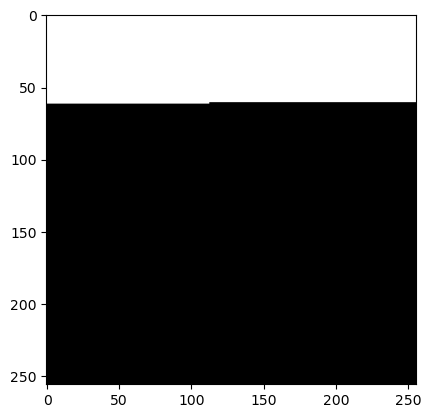

In [22]:
plt.imshow(pred_in_com_1_tmp, cmap = 'gray')

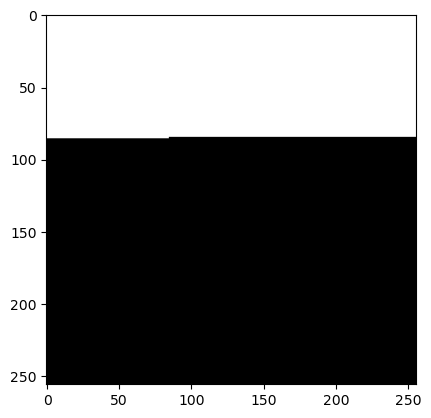

In [23]:
plt.imshow(pred_in_com_1_dsp, cmap = 'gray')

1/1 [==============================] - 0s 189ms/step


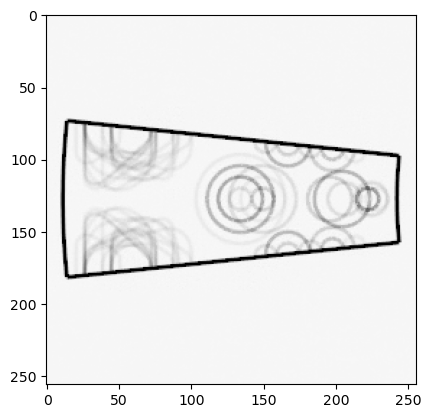

In [24]:
pred_in_com_1 = pred_in_com_1.reshape((1,256,256,2))

pred_out_com_1 = model.predict(pred_in_com_1)

pred_out_com_1 = pred_out_com_1.reshape((256, 256))

plt.imshow(pred_out_com_1, cmap = 'gray')

In [25]:
################################################################################################################################

In [26]:
pred_in_com_2_tmp_path = 'C:\hyundai_cgan_data' + '\\test_inputs'+ '\\tmp_test_input' + '\\tmp_test_com_2_in.png'
pred_in_com_2_dsp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\dsp_test_input' + '\\dsp_test_com_2_in.png'

pred_in_com_2_tmp = imread(pred_in_com_2_tmp_path)
pred_in_com_2_dsp = imread(pred_in_com_2_dsp_path)

pred_in_com_2_tmp = pred_in_com_2_tmp.reshape((256, 256, 1))
pred_in_com_2_dsp = pred_in_com_2_dsp.reshape((256, 256, 1))

pred_in_com_2 = np.concatenate((pred_in_com_2_tmp, pred_in_com_2_dsp), axis=2)

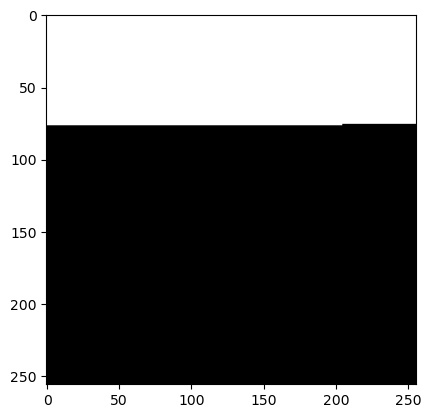

In [27]:
plt.imshow(pred_in_com_2_tmp, cmap = 'gray')

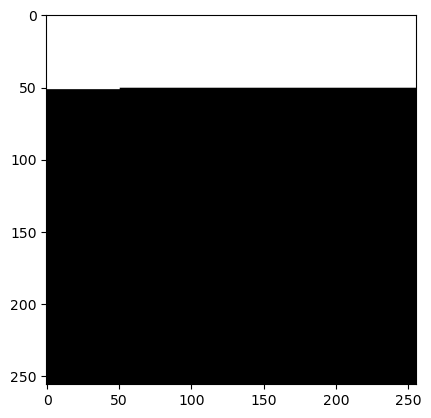

In [28]:
plt.imshow(pred_in_com_2_dsp, cmap = 'gray')

1/1 [==============================] - 0s 63ms/step


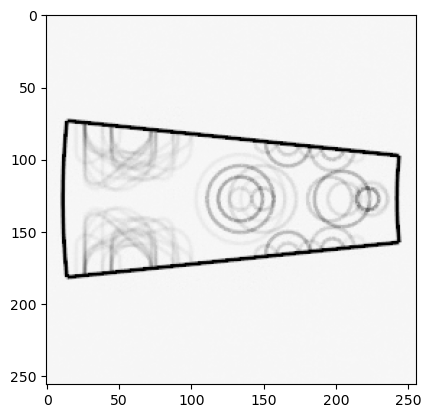

In [29]:
pred_in_com_2 = pred_in_com_2.reshape((1,256, 256, 2))

pred_out_com_2 = model.predict(pred_in_com_2)

pred_out_com_2 = pred_out_com_2.reshape((256, 256))

plt.imshow(pred_out_com_2, cmap = 'gray')

In [30]:
################################################################################################################################

In [31]:
pred_in_com_3_tmp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\tmp_test_input' + '\\tmp_test_com_3_in.png'
pred_in_com_3_dsp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\dsp_test_input' + '\\dsp_test_com_3_in.png'

pred_in_com_3_tmp = imread(pred_in_com_3_tmp_path)
pred_in_com_3_dsp = imread(pred_in_com_3_dsp_path)

pred_in_com_3_tmp = pred_in_com_3_tmp.reshape((256, 256, 1))
pred_in_com_3_dsp = pred_in_com_3_dsp.reshape((256, 256, 1))

pred_in_com_3 = np.concatenate((pred_in_com_3_tmp, pred_in_com_3_dsp), axis=2)

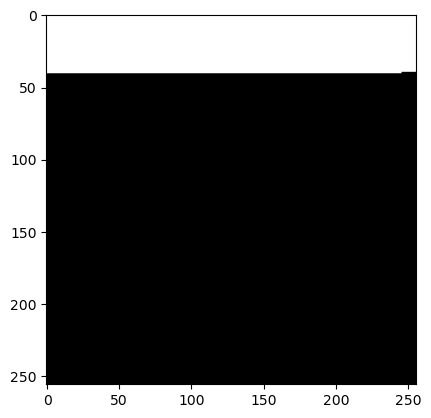

In [32]:
plt.imshow(pred_in_com_3_tmp, cmap = 'gray')

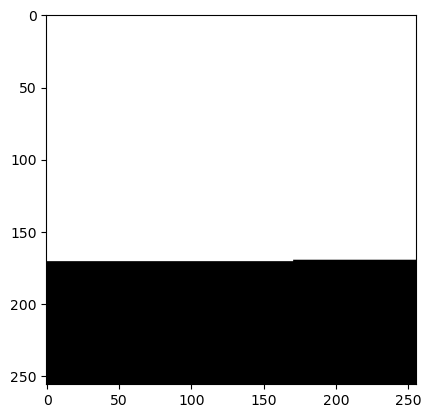

In [33]:
plt.imshow(pred_in_com_3_dsp, cmap = 'gray')

1/1 [==============================] - 0s 63ms/step


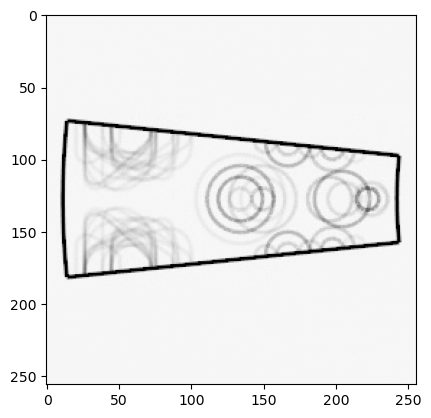

In [34]:
pred_in_com_3 = pred_in_com_3.reshape((1,256, 256, 2))

pred_out_com_3 = model.predict(pred_in_com_3)

pred_out_com_3 = pred_out_com_3.reshape((256, 256))

plt.imshow(pred_out_com_3, cmap = 'gray')

In [35]:
################################################################################################################################

In [36]:
pred_in_com_4_tmp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\tmp_test_input' + '\\tmp_test_com_4_in.png'
pred_in_com_4_dsp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\dsp_test_input' + '\\dsp_test_com_4_in.png'

pred_in_com_4_tmp = imread(pred_in_com_4_tmp_path)
pred_in_com_4_dsp = imread(pred_in_com_4_dsp_path)

pred_in_com_4_tmp = pred_in_com_4_tmp.reshape((256, 256, 1))
pred_in_com_4_dsp = pred_in_com_4_dsp.reshape((256, 256, 1))

pred_in_com_4 = np.concatenate((pred_in_com_4_tmp, pred_in_com_4_dsp), axis=2)

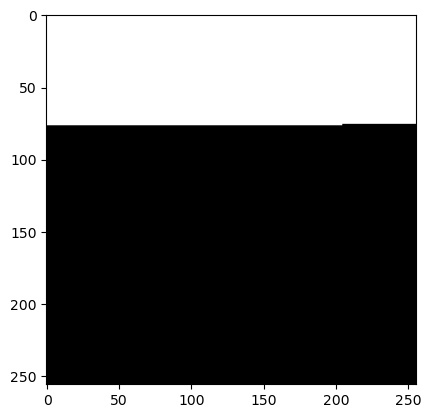

In [37]:
plt.imshow(pred_in_com_4_tmp, cmap = 'gray')

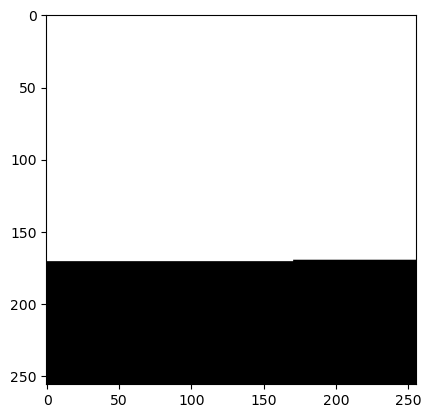

In [38]:
plt.imshow(pred_in_com_4_dsp, cmap = 'gray')

1/1 [==============================] - 0s 71ms/step


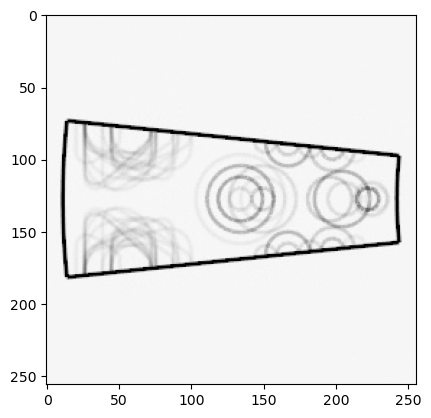

In [39]:
pred_in_com_4 = pred_in_com_4.reshape((1,256, 256, 2))

pred_out_com_4 = model.predict(pred_in_com_4)

pred_out_com_4 = pred_out_com_4.reshape((256, 256))

plt.imshow(pred_out_com_4, cmap = 'gray')

In [40]:
################################################################################################################################

In [41]:
pred_in_com_5_tmp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\tmp_test_input' + '\\tmp_test_com_5_in.png'
pred_in_com_5_dsp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\dsp_test_input' + '\\dsp_test_com_5_in.png'

pred_in_com_5_tmp = imread(pred_in_com_5_tmp_path)
pred_in_com_5_dsp = imread(pred_in_com_5_dsp_path)

pred_in_com_5_tmp = pred_in_com_5_tmp.reshape((256, 256, 1))
pred_in_com_5_dsp = pred_in_com_5_dsp.reshape((256, 256, 1))

pred_in_com_5 = np.concatenate((pred_in_com_5_tmp, pred_in_com_5_dsp), axis=2)

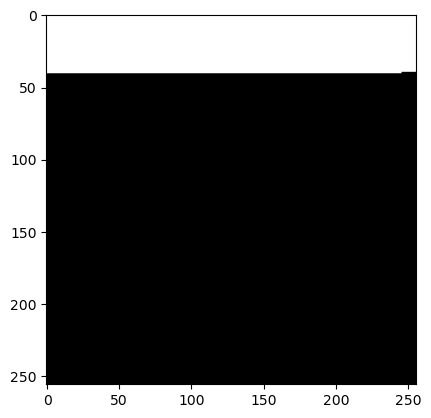

In [42]:
plt.imshow(pred_in_com_5_tmp, cmap = 'gray')

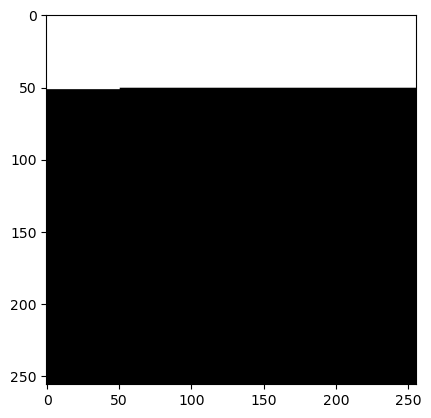

In [43]:
plt.imshow(pred_in_com_5_dsp, cmap = 'gray')

1/1 [==============================] - 0s 64ms/step


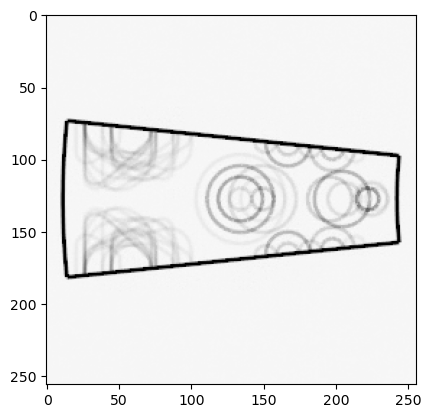

In [44]:
pred_in_com_5 = pred_in_com_5.reshape((1, 256, 256, 2))

pred_out_com_5 = model.predict(pred_in_com_5)

pred_out_com_5 = pred_out_com_5.reshape((256, 256))

plt.imshow(pred_out_com_5, cmap = 'gray')

In [45]:
################################################################################################################################

In [46]:
model.save("hyundai_circular_256_256_unet_it_1")

INFO:tensorflow:Assets written to: hyundai_circular_256_256_unet_it_1\assets


INFO:tensorflow:Assets written to: hyundai_circular_256_256_unet_it_1\assets
